In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-classification-using-deep-learn.ipynb  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2394.jpg', 'with_mask_2181.jpg', 'with_mask_3163.jpg', 'with_mask_870.jpg', 'with_mask_3466.jpg']
['with_mask_3170.jpg', 'with_mask_2887.jpg', 'with_mask_578.jpg', 'with_mask_2421.jpg', 'with_mask_3104.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3808.jpg', 'without_mask_2033.jpg', 'without_mask_3236.jpg', 'without_mask_1767.jpg', 'without_mask_879.jpg']
['without_mask_1804.jpg', 'without_mask_1374.jpg', 'without_mask_2192.jpg', 'without_mask_629.jpg', 'without_mask_2832.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

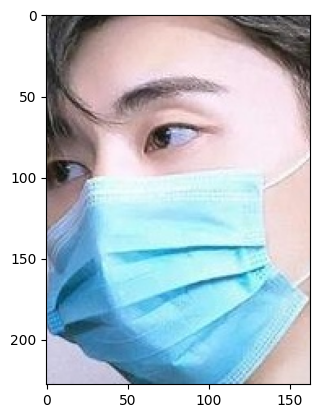

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

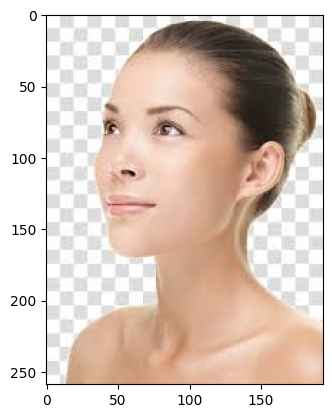

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[222, 174, 112],
        [223, 175, 113],
        [207, 159,  98],
        ...,
        [236, 209, 172],
        [250, 227, 187],
        [253, 230, 187]],

       [[225, 178, 118],
        [214, 166, 106],
        [217, 169, 110],
        ...,
        [231, 202, 166],
        [227, 199, 160],
        [225, 198, 158]],

       [[219, 173, 115],
        [209, 163, 105],
        [226, 181, 124],
        ...,
        [206, 171, 129],
        [222, 187, 145],
        [228, 193, 151]]], dtype=uint8)
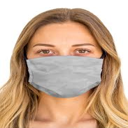

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[167, 120,  50],
        [167, 120,  50],
        [166, 119,  49],
        ...,
        [197, 125,  39],
        [196, 126,  45],
        [194, 124,  45]],

       [[167, 120,  48],
        [167, 120,  48],
        [166, 119,  47],
        ...,
        [195, 130,  57],
        [192, 129,  52],
        [187, 127,  48]],

       [[168, 120,  48],
        [168, 120,  48],
        [167, 119,  47],
        ...,
        [207, 145,  91],
        [203, 143,  94],
        [198, 139,  92]],

       ...,

       [[ 48,  40,  32],
        [ 11,   4,   0],
        [  3,   0,   0],
        ...,
        [ 62,  57,  51],
        [ 58,  55,  51],
        [ 65,  62,  58]],

       [[ 48,  44,  40],
        [ 12,   9,   6],
        [  2,   0,   0],
        ...,
        [ 62,  57,  53],
        [ 61,  58,  53],
        [ 65,  61,  57]],

       [[ 18,  19,  19],
        [  3,   3,   3],
        [  2,   2,   1],
        ...,
        [ 61,  56,  53],
        [ 53,  48,  44],
        [ 57,  52,  46]]], dtype=uint8)
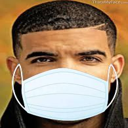

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.65490196, 0.47058824, 0.19607843],
        [0.65490196, 0.47058824, 0.19607843],
        [0.65098039, 0.46666667, 0.19215686],
        ...,
        [0.77254902, 0.49019608, 0.15294118],
        [0.76862745, 0.49411765, 0.17647059],
        [0.76078431, 0.48627451, 0.17647059]],

       [[0.65490196, 0.47058824, 0.18823529],
        [0.65490196, 0.47058824, 0.18823529],
        [0.65098039, 0.46666667, 0.18431373],
        ...,
        [0.76470588, 0.50980392, 0.22352941],
        [0.75294118, 0.50588235, 0.20392157],
        [0.73333333, 0.49803922, 0.18823529]],

       [[0.65882353, 0.47058824, 0.18823529],
        [0.65882353, 0.47058824, 0.18823529],
        [0.65490196, 0.46666667, 0.18431373],
        ...,
        [0.81176471, 0.56862745, 0.35686275],
        [0.79607843, 0.56078431, 0.36862745],
        [0.77647059, 0.54509804, 0.36078431]],

       ...,

       [[0.18823529, 0.15686275, 0.1254902 ],
        [0.04313725, 0.01568627, 0.        ],
        [0.01176471, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.5119 - acc: 0.7953 - val_loss: 0.2820 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2858 - acc: 0.8854 - val_loss: 0.2832 - val_acc: 0.8694
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2350 - acc: 0.9082 - val_loss: 0.2279 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2017 - acc: 0.9224 - val_loss: 0.2498 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1606 - acc: 0.9362 - val_loss: 0.2855 - val_acc: 0.9008


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2296 - acc: 0.9133
Test Accuracy = 0.9133024215698242


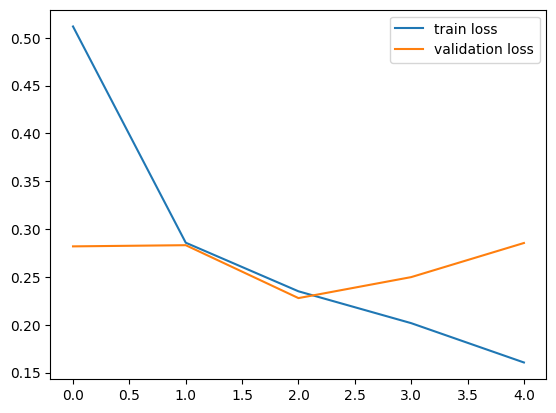

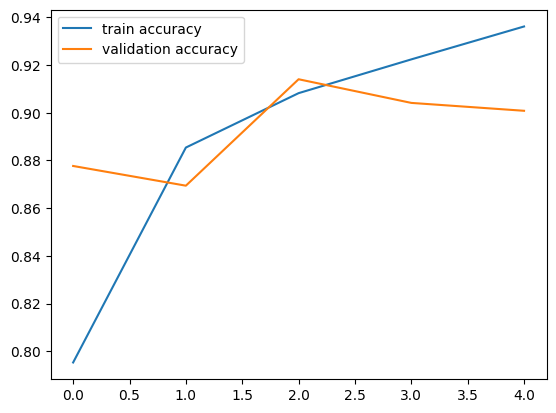

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/download.jpeg


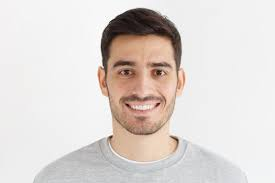

1/1 [==============================] - 0s 17ms/step
[[0.390405   0.52938545]]
1
The person in the image is wearing a mask


In [72]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1004.jpg


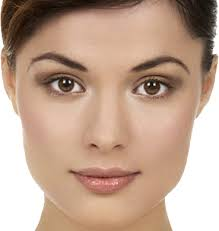

1/1 [==============================] - 0s 27ms/step
[[0.4439787 0.4464982]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [81]:
model.save('mask_detector_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
from keras.models import Sequential
from keras.layers import Dense

# Example model
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Example training (replace with your actual training process)
# X_train, Y_train = load_your_training_data()
# model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Save the model to disk
model.save('mask_detector_model.h5')
print("Model saved to disk.")

Model saved to disk.
